<a href="https://www.kaggle.com/code/matheus133/linear-regression-library-and-coded-from-scratch?scriptVersionId=200374471" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Exploring Linear Regression: A Comparison of Scikit-learn LR model and our model coded from scratch!

## Introduction

In this notebook, we will explore **linear regression**, a fundamental algorithm in machine learning used to model the relationship between a dependent variable and one or more independent variables.

Specifically, we will:

- Utilize **Scikit-learn’s LinearRegression** implementation to quickly create and train a linear model.
- Code our own version of **gradient descent** from scratch to understand the underlying mathematics and mechanics of linear regression.

We will apply both methods to a **univariate linear regression problem**, where:

- **X** represents the **years of experience** of employees.
- **Y** represents the corresponding **salary amounts**.

### Objective

The primary goal is to compare the results of Scikit-learn’s built-in linear regression with our manually coded gradient descent. By doing this, we can gain a better understanding of how the algorithms work from scratch.

### What you'll learn:

- How to implement and use **Scikit-learn's LinearRegression** to fit a simple linear model.
- How to **code gradient descent from scratch**, step by step, to solve the same problem.
- **Compare** the results of both approaches.

Let's dive into the world of **linear regression** and discover how the two approaches fare when applied to the years of experience vs. salary dataset!

Inspired by Andrew Ng.


## Initial data exploration and fixes

In [1]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
#Load the dataset into a pandas DataFrame
df = pd.read_csv('/kaggle/input/salary-dataset-simple-linear-regression/Salary_dataset.csv')


# Display the first few rows of the DataFrame
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [3]:
#Exclude first column (id)
df = df.iloc[:, 1:]
df.head()

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


In [4]:
# Correlation matrix
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [5]:
years_experience = df['YearsExperience'].values.reshape(-1, 1) # convert the data into a 2D array
salaries = df['Salary'].values  

## Linear regression from Sklearn

In [6]:
# Splitting the data to train and to validate (test) the model later
X_train, X_test, y_train, y_test = train_test_split(years_experience, salaries, test_size=0.2, random_state=0)

In [7]:
# Using the LinearRegression model from sklearn library
simple_linear_regression = LinearRegression()
simple_linear_regression.fit(X_train, y_train)

LinearRegression()

In [8]:
# Just taking a look at the found W, for curiosity...
w = simple_linear_regression.coef_
# Just taking a look at the found B, for curiosity too...
n = simple_linear_regression.intercept_

print("The w parameter is:", w)
print("The bias is:", n)

The w parameter is: [9312.57512673]
The bias is: 25849.841637955273


In [9]:
# Predicting the result for X never seen before 
y_pred = simple_linear_regression.predict(X_test)

# Prediction on trained data
y_pred_train = simple_linear_regression.predict(X_train)

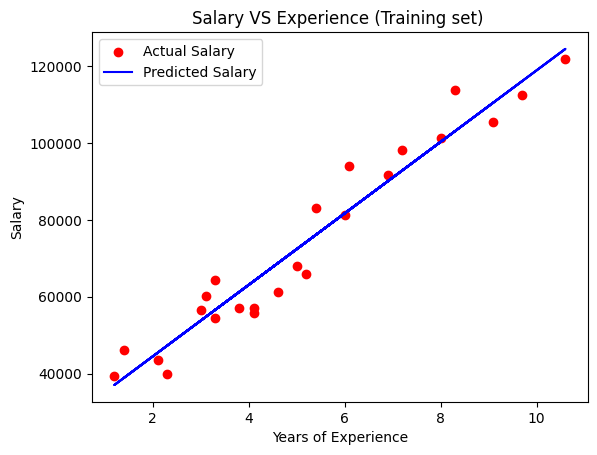

In [10]:
# Plotting graph
plt.scatter(X_train, y_train, color = 'r', label = 'Actual Salary')
plt.plot(X_train, y_pred_train, color = "b", label = 'Predicted Salary')
plt.plot(X_train,simple_linear_regression.predict(X_train), color = 'b')
plt.title('Salary VS Experience (Training set) ')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.show()

## Coding a linear regression model from scratch
### But yeah... that was pretty easy, right?

No real code needed, no functions, no math! *hehehe* 😄

Now, let's make it a bit more **interesting**. 

Instead of using the `Sklearn` `LinearRegression` model, why don't we create our own model from scratch? 🚀

---

#### Model function equation
So, first, let's code our fundamental function piece, the code to represent the model equation:
$$
\color{red}{f_{wb}(x) = wx+b}
$$
This function is the pilar of our linear regression, as it defines `y` predictions according to `x` and the parameters `w` and `b`. Considering we know the values `w` and `b`, we could predict the output... but now there is a long way to actually find these values.

In [11]:
def f_wb(x, w_param, b_param):
    return x * w_param + b_param

#### Cost function
Now, let's define the cost function, this will function is represented by the mathematical equation: 
$$
\color{orange}{J(w, b)} = \frac{1}{2m} \sum_{i=1}^{m} \left( \color{red}{f_{wb}(x^{(i)})} - y^{(i)} \right)^2
$$
It basically defines how much error was aggregated when iterating all the training X values, for certain  set parameters `w` and `b`. Where error is the difference between the predicted and the actual `y`.

In [12]:
def cost_j(w, b, x_train, y_train):
    """
    Computes the cost function for linear regression.
    
    Args:
        x (ndarray): Shape (m,) Input to the model (Population of cities) 
        y (ndarray): Shape (m,) Label (Actual profits for the cities)
        w, b (scalar): Parameters of the model
    
    Returns
        total_cost (float): The cost of using w,b as the parameters for linear regression
               to fit the data points in x and y
    """
    m = len(x_train)
    total_cost = 0
    for i in range(m):
        predicted_value = f_wb(X_train[i], w, b)
        target_value = y_train[i]
        total_cost += (predicted_value - target_value)**2
    
    return total_cost/(2*m)

#### Gradient descent
Common linear regression algorithm that has its purpose on minimizing errors between the predicted and actual values. Its goal is to converge the parameters `w` and `b` into the minimal cost possible, by doing that, it comes up with the best and correct parameters that will be used to predict `y`.

Here is the mathematical model:
$$
\text{repeat until convergence \{} \\
\quad w = w - \alpha \color{blue}{\frac{\partial}{\partial w} J(w, b)} \\
\quad b = b - \alpha \color{purple}{\frac{\partial}{\partial b} J(w, b)} \\
\text{\}}
$$

Let's break down the derivation:

$$
\color{blue}{\frac{\partial J(w, b)}{\partial w_j}} = \frac{1}{m} \sum_{i=0}^{m-1} \left( f_{w,b}(x^{(i)}) - y^{(i)} \right) x_j^{(i)}
$$

$$
\color{purple}{\frac{\partial J(w, b)}{\partial b}} = \frac{1}{m} \sum_{i=0}^{m-1} \left( f_{w,b}(x^{(i)}) - y^{(i)} \right)
$$

In [13]:
def compute_gradient(X, y, w, b):
    """
    Computes the gradient for linear regression 
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter

    Returns:
      dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w. 
      dj_db (scalar):       The gradient of the cost w.r.t. the parameter b. 
    """
    m = len(X)
    dj_dw = 0 
    dj_db = 0              
    for i in range(m):
        predict = f_wb(X[i], w, b)
        err = predict - y[i]
        dj_dw += err*X[i]
        dj_db += err

    dj_dw = dj_dw / m
    dj_db = dj_db / m
    
    return dj_dw, dj_db

And now the full algorithm, updating the parameters until convergence:

In [14]:
def gradient_descent(X, y, initial_w, initial_b, gradient_f, alpha, num_iters):
    """
    Performs batch gradient descent to learn w and b. Updates w and b by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      X (ndarray (m,n))   : Data, m examples with n features
      y (ndarray (m,))    : target values
      initial_w (ndarray (n,)) : initial model parameters  
      initial_b (scalar)       : initial model parameter
      gradient_f   : function to compute the gradient
      alpha (float)       : Learning rate
      num_iters (int)     : number of iterations to run gradient descent
      
    Returns:
      w (ndarray (n,)) : Updated values of parameters 
      b (scalar)       : Updated value of parameter 
      """
    w = initial_w
    b = initial_b
    for i in range(num_iters):
        dj_dw,dj_db = gradient_f(X, y, w, b)   ## compute_gradient from upper in this case
        w = w - (alpha * dj_dw)
        b = b - (alpha * dj_db)
    
    return w, b

In [15]:
# Splitting new chunks of data to train and to validate (test) the model later
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(years_experience, salaries, test_size=0.2, random_state=0)

tmp_alpha = 0.05 # Defining some alpha parameter
iterations = 1000

w, b = gradient_descent(X_train_2, y_train_2, 1, 1, compute_gradient, tmp_alpha, iterations)

print("The w parameter is:", w)
print("The bias is:", n)

The w parameter is: [9312.7739437]
The bias is: 25849.841637955273


In [16]:
predictions = []
for i in range(len(X_train)):
    # Here we predict the values based on the w and b found.
    predictions.append(f_wb(X_train_2[i], w, b))

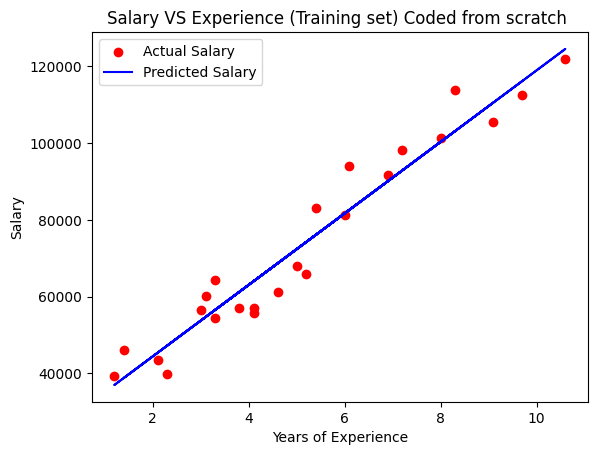

In [17]:
plt.scatter(X_train_2, y_train_2, color = 'r', label = 'Actual Salary')
plt.plot(X_train_2, predictions, color = "b", label = 'Predicted Salary')
plt.title('Salary VS Experience (Training set) Coded from scratch ')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.show()

Here it's possible to see how similar the results are to the `Sklearn` model. Even the found `w` and `b` fall really close to each other.